# Guía 8 - Ejercicio 2.3
En este ejercicio se lee la imagen de lluvia de estrellas y se extrae de ella una estrella que está en caída en forma diagonal, para ello se aplica una erosión con un kernel que contiene esta forma "diagonal", de esta forma se elimina de la imagen todo lo que no contenga esta forma

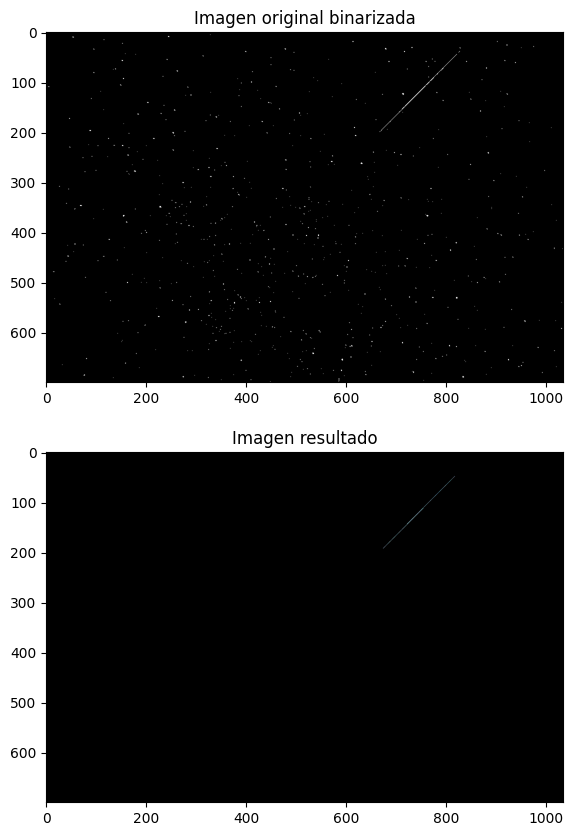

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imagen = cv.imread("Imagenes/lluviaEstrellas.jpg")
imagen_gris = cv.cvtColor(imagen,cv.COLOR_BGR2GRAY)

_,imagen_bin = cv.threshold(imagen_gris, 127,255,cv.THRESH_BINARY)

kernel = np.zeros((3,3), np.uint8)

kernel[0,2] = 1
kernel[1,1] = 1
kernel[2,0] = 1

imagen_erosion = cv.erode(imagen_bin,kernel,iterations = 4)
resultado = cv.bitwise_and(imagen,imagen, mask = imagen_erosion)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].imshow(imagen_bin, cmap='gray')
axs[0].set_title('Imagen original binarizada')

resultado = cv.bitwise_and(imagen, imagen, mask=imagen_erosion)
axs[1].imshow(resultado, cmap='gray')
axs[1].set_title('Imagen resultado')

plt.show()
